## Association Rules Analysis

In [22]:
#!pip install mlxtend

In [23]:
import mlxtend

mlxtend.__version__

'0.22.0'

In [24]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings("ignore")

In [25]:
pd.__version__

'2.0.3'

## Read the dataset

In [26]:
bb_df = pd.read_csv("https://raw.githubusercontent.com/manaranjanp/IIMBClasses/main/recsys/BB_2014.csv")
bb_df.head()

,SKU,Order,Delivery Date,Description
0,6883056,7998299,2014-04-23,Tide_Naturals Detergent Powder Lemon Chandan
1,6883056,6609767,2014-08-22,Tide_Naturals Detergent Powder Lemon Chandan
2,6883056,7963892,2014-05-05,Tide_Naturals Detergent Powder Lemon Chandan
3,6883056,7883032,2014-06-15,Tide_Naturals Detergent Powder Lemon Chandan
4,6883056,6474677,2014-09-25,Tide_Naturals Detergent Powder Lemon Chandan


## Exploring the dataset

In [27]:
len(bb_df.Order.unique())

32531

In [28]:
len(bb_df.SKU.unique())

6956

In [29]:
sku_desc_dict = dict(zip(bb_df.SKU, bb_df.Description))

In [30]:
len(sku_desc_dict)

6956

## Most Sold Items

In [31]:
most_sold_df = bb_df.SKU.value_counts().reset_index()

In [32]:
most_sold_df.columns = ['SKU', 'Count']

In [33]:
top_10_sold_items = most_sold_df.sort_values("Count", ascending = False)[0:10]

In [34]:
top_10_sold_items['Description'] = top_10_sold_items.SKU.map(lambda x:sku_desc_dict[x])

In [35]:
top_10_sold_items

,SKU,Count,Description
0,34995363,1357,Amrutha_Agarbatti Lavender
1,34989061,1331,MILKY MIST_Curd Farm Fresh
2,15668520,1179,DAILY BREAD_Bread Brown
3,34934493,1103,Bingo_Yumitos Original Style Salt Sprinkled
4,15670251,1037,Gopalan Organic_Spinach
5,93100949,841,Parrys_Refined Sugar
6,34936518,761,Fab 360_Fabric Washing Liquid
7,34988104,755,Rin_Detergent Bar
8,34935354,748,Nexcare_Face Cleaning Pads
9,92816234,695,fortune_Refined Oil Rice Bran


## Encoding the Baskets


In [36]:
bb_df.drop( 'Description', axis = 1, inplace = True)

In [37]:
bb_df['Quantity'] = 1

In [38]:
bb_df.head()

,SKU,Order,Delivery Date,Quantity
0,6883056,7998299,2014-04-23,1
1,6883056,6609767,2014-08-22,1
2,6883056,7963892,2014-05-05,1
3,6883056,7883032,2014-06-15,1
4,6883056,6474677,2014-09-25,1


In [39]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142844 entries, 0 to 142843
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SKU            142844 non-null  int64 
 1   Order          142844 non-null  int64 
 2   Delivery Date  142844 non-null  object
 3   Quantity       142844 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.4+ MB


In [40]:
bb_df['Quantity'] = bb_df['Quantity']

In [41]:
bb_pivot_df = bb_df.pivot( index='Order',
                          columns='SKU',
                          values = "Quantity" ).astype('float16').reset_index(drop=True)

In [42]:
bb_pivot_df.head(5)

SKU,6883056,15668519,15668520,15668521,15668541,15668542,15670123,15670144,15670145,15670146,...,93302183,93302184,93302186,93303345,93303349,93316685,93316921,93316922,93320243,108525199
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
bb_pivot_df.fillna( 0, inplace = True )

In [44]:
bb_pivot_df.head(5)

SKU,6883056,15668519,15668520,15668521,15668541,15668542,15670123,15670144,15670145,15670146,...,93302183,93302184,93302186,93303345,93303349,93316685,93316921,93316922,93320243,108525199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
bb_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Columns: 6956 entries, 6883056 to 108525199
dtypes: float16(6956)
memory usage: 431.6 MB


In [46]:
bb_pivot_df.shape

(32531, 6956)

## Apriori : Finding Itemsets


In [47]:
frequent_itemsets = apriori(bb_pivot_df,
                            min_support=0.001,
                            use_colnames=True,
                            low_memory = True)

In [48]:
frequent_itemsets.tail(10)

,support,itemsets
1111,0.001014,"(34994312, 15670251, 15670157)"
1112,0.001107,"(15670251, 15670157, 34994319)"
1113,0.001045,"(34994312, 34994313, 15670251)"
1114,0.002213,"(34994312, 15670251, 34994319)"
1115,0.001230,"(34994313, 15670251, 34994319)"
1116,0.001045,"(34994312, 34994234, 34994319)"
1117,0.001168,"(34994312, 34994306, 34994319)"
1118,0.001076,"(34994312, 34994307, 34994319)"
1119,0.001844,"(34994312, 34994313, 34994319)"
1120,0.001967,"(93141092, 93141022, 93141023)"


In [49]:
import matplotlib.pyplot as plt

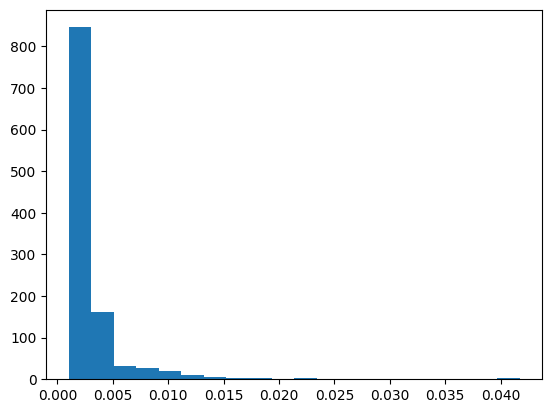

In [50]:
plt.hist(frequent_itemsets.support, bins = 20);

## Finding Association Rules

In [51]:
rules = association_rules(frequent_itemsets,
                          metric="lift",
                          min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(15668520),(34934493),0.036242,0.033906,0.001598,0.044105,1.300803,0.000370,1.010670,0.239940
1,(34934493),(15668520),0.033906,0.036242,0.001598,0.047144,1.300803,0.000370,1.011441,0.239360
2,(15668520),(34989061),0.036242,0.040915,0.002244,0.061917,1.513312,0.000761,1.022388,0.351953
3,(34989061),(15668520),0.040915,0.036242,0.002244,0.054846,1.513312,0.000761,1.019683,0.353668
4,(15668520),(93100949),0.036242,0.025852,0.001322,0.036472,1.410769,0.000385,1.011021,0.302116
5,(93100949),(15668520),0.025852,0.036242,0.001322,0.051130,1.410769,0.000385,1.015689,0.298894
6,(15668521),(34989061),0.019059,0.040915,0.001445,0.075806,1.852787,0.000665,1.037754,0.469215
7,(34989061),(15668521),0.040915,0.019059,0.001445,0.035312,1.852787,0.000665,1.016848,0.479908
8,(15670144),(15670251),0.003996,0.031877,0.001322,0.330769,10.376329,0.001194,1.446620,0.907252
9,(15670251),(15670144),0.031877,0.003996,0.001322,0.041466,10.376329,0.001194,1.039090,0.933380


In [52]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         300 non-null    object 
 1   consequents         300 non-null    object 
 2   antecedent support  300 non-null    float64
 3   consequent support  300 non-null    float64
 4   support             300 non-null    float64
 5   confidence          300 non-null    float64
 6   lift                300 non-null    float64
 7   leverage            300 non-null    float64
 8   conviction          300 non-null    float64
 9   zhangs_metric       300 non-null    float64
dtypes: float64(8), object(2)
memory usage: 23.6+ KB


## Making sense of the rules

In [53]:
def get_sku_description( skus ):
    all_skus = []
    for sku in skus:
         all_skus.append(sku_desc_dict[sku])
    return ",".join(all_skus)

In [54]:
rules.antecedents[0]

frozenset({15668520})

In [55]:
rules['antecedents_desc'] = rules.antecedents.map(lambda rec: sku_desc_dict[list(rec)[0]])

In [56]:
rules['consequents_desc'] = rules.consequents.map(lambda rec: sku_desc_dict[list(rec)[0]])

In [57]:
rules = rules.sort_values('confidence', ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_desc,consequents_desc
282,"(34994312, 34994307)",(34994319),0.001476,0.017583,0.001076,0.729167,41.469441,0.001050,3.627385,0.977328,TVS Organics_Potato,TVS Organics_Onion Regular
270,"(34994312, 34994234)",(34994319),0.001445,0.017583,0.001045,0.723404,41.141719,0.001020,3.551814,0.977105,TVS Organics_Potato,TVS Organics_Onion Regular
272,"(34994234, 34994319)",(34994312),0.001445,0.013925,0.001045,0.723404,51.949369,0.001025,3.565040,0.982170,Gopalan Organic_Capsicum Green,TVS Organics_Potato
276,"(34994312, 34994306)",(34994319),0.001629,0.017583,0.001168,0.716981,40.776421,0.001139,3.471206,0.977068,TVS Organics_Potato,TVS Organics_Onion Regular
241,"(34994312, 15670157)",(15670251),0.001476,0.031877,0.001014,0.687500,21.567080,0.000967,3.097993,0.955042,TVS Organics_Potato,Gopalan Organic_Spinach
288,"(34994312, 34994313)",(34994319),0.002736,0.017583,0.001844,0.674157,38.340928,0.001796,3.015003,0.976590,TVS Organics_Potato,TVS Organics_Onion Regular
248,"(15670157, 34994319)",(15670251),0.001721,0.031877,0.001107,0.642857,20.166620,0.001052,2.710744,0.952052,Gopalan Organic_Bhindi,Gopalan Organic_Spinach
296,"(93141022, 93141023)",(93141092),0.003105,0.008761,0.001967,0.633663,72.328783,0.001940,2.705815,0.989246,Danone_Yoghurt Vanilla Flavour,Danone_Yoghurt Mango Flavour
258,"(34994312, 15670251)",(34994319),0.003566,0.017583,0.002213,0.620690,35.300096,0.002151,2.590008,0.975149,TVS Organics_Potato,TVS Organics_Onion Regular
284,"(34994307, 34994319)",(34994312),0.001783,0.013925,0.001076,0.603448,43.335047,0.001051,2.486623,0.978669,TVS Organics_Tomato Hybrid,TVS Organics_Potato


In [58]:
rules.to_excel("rules.xlsx", index = False)

In [59]:
import seaborn as sn

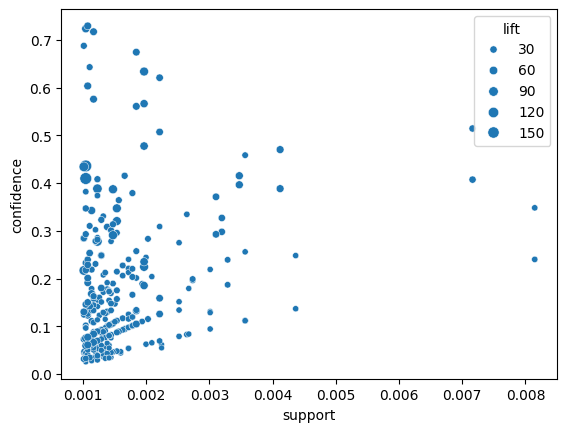

In [60]:
sn.scatterplot( data = rules,
                x = 'support',
                y = 'confidence',
                size = 'lift');

In [85]:
top_50_rules = rules.sort_values('confidence', ascending=False)[0:50]

In [86]:
rules_crosstab = pd.crosstab(top_50_rules.consequents_desc,
                             top_50_rules.antecedents_desc,
                             values = top_50_rules.lift,
                             aggfunc = 'max')

In [87]:
rules_crosstab

antecedents_desc,Adi Naturals_Organic Capsicum Red,Adi Naturals_Organic Capsicum Yellow,Ambrosia_Capsicum Green,Danone_Yoghurt Blueberry,Danone_Yoghurt Mango Flavour,Danone_Yoghurt Strawberry Flavour,Danone_Yoghurt Vanilla Flavour,Fab 360_Fabric Washing Liquid,Gopalan Organic_Bhindi,Gopalan Organic_Capsicum Green,...,Paper Boat_Drink Jaljeera,Paper Boat_Drink Jamun Kala Khatta,Quaker_Oats Lemony Veggie Mix,Sunfeast _Farmlite Biscuit Oats Raisins,TVS Organics_Lemon,TVS Organics_Onion Regular,TVS Organics_Onion Small,TVS Organics_Potato,TVS Organics_Tomato Country,TVS Organics_Tomato Hybrid
consequents_desc,,,,,,,,,,,,,,,,,,,,,
Adi Naturals_Organic Capsicum Red,NaN,170.845535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adi Naturals_Organic Capsicum Yellow,170.845535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ambrosia_Ladies Finger,NaN,NaN,30.484438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bingo_Yumitos Original Style Salt Sprinkled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2703,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Danone_Yoghurt Mango Flavour,NaN,NaN,NaN,NaN,NaN,44.334136,72.328783,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Danone_Yoghurt Strawberry Flavour,NaN,NaN,NaN,29.062835,53.404744,NaN,35.013116,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Danone_Yoghurt Vanilla Flavour,NaN,NaN,NaN,NaN,57.122035,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gopalan Organic_Spinach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.16662,10.054583,...,NaN,NaN,NaN,NaN,11.727214,NaN,NaN,21.567080,NaN,9.841663
KurKure_Namkeen Puffcorn Yummy Cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


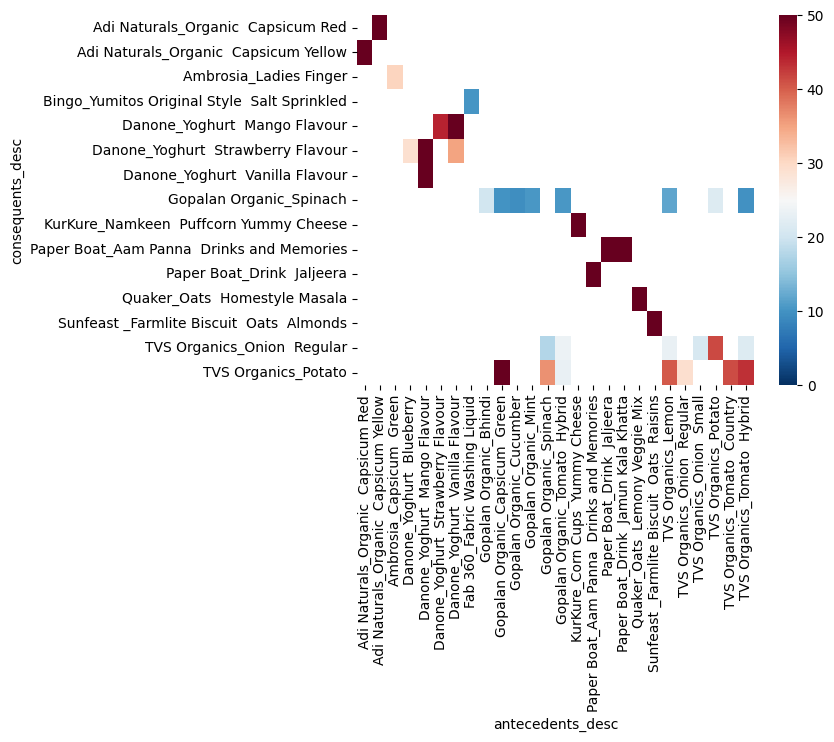

In [89]:
sn.heatmap(rules_crosstab, cmap = 'RdBu_r', vmin=0, vmax=50);